In [3]:
from numpy.polynomial.legendre import legval, legvander
import numpy as np

# モデル関数: f(x) = x + 2
def model(x):
    return x + 2

# サンプル点（[-1, 1] の一様分布を想定）
N = 100
x = np.random.uniform(-1, 1, N)
y = model(x)

# Legendre多項式の基底（次数2まで）
deg = 2
V = legvander(x, deg)  # Vandermonde matrix: 各点での多項式評価

# 最小二乗で係数を推定
coeffs, *_ = np.linalg.lstsq(V, y, rcond=None)

print("PCE（Legendre基底）係数:", coeffs)


PCE（Legendre基底）係数: [2.00000000e+00 1.00000000e+00 5.79404092e-18]


In [15]:
import numpy as np

B_dash = [[1, 2], [3, 4]]
# 2x2 のブロック行列を用意
B = np.array(B_dash)
C = np.array([[5, 6], [7, 8]])
D = np.array([[9, 10], [11, 12]])
E = np.array([[13, 14], [15, 16]])

# ブロックを2x2に配置してnp.blockでまとめる
A = np.block([[B, C],
              [D, E]])

print(A)

[[ 1  2  5  6]
 [ 3  4  7  8]
 [ 9 10 13 14]
 [11 12 15 16]]


In [13]:
import numpy as np

# 2x2 のブロック行列を用意
B = np.array([[1, 2], [3, 4]])
C = np.array([[5, 6], [7, 8]])
D = np.array([[9, 10], [11, 12]])
E = np.array([[13, 14], [15, 16]])

# ブロックを2x2に配置してnp.blockでまとめる
A = np.block([[B, C],
              [D, E]])

print(A)


[[ 1  2  5  6]
 [ 3  4  7  8]
 [ 9 10 13 14]
 [11 12 15 16]]


In [1]:
import numpy as np
import cvxpy as cp
from scipy.linalg import block_diag

# 例として小さな系を用意
n = 2   # 状態数
m = 1   # 入力数
p = 1   # カオス次数 → (p+1)で拡張次元に拡張される

# システム行列（任意の値に設定可能）
A = np.array([[0.5, 1.0],
              [-1.0, -2.0]])
B = np.array([[1.0],
              [0.0]])

Ip = np.eye(p + 1)
A_big = np.kron(np.eye(p + 1), A)
B_big = np.kron(np.eye(p + 1), B)

# 重み行列（任意）
Q = np.eye(n)
R = np.eye(m)
W = np.eye(p + 1)
Qx_bar = np.kron(Q, W)
Ru_bar = np.kron(R, W)

# Kをランダムに初期化（実際は反復で更新）
K = np.random.randn(m, n)

# K_full = K ⊗ Ip
K_big = np.kron(K, Ip)

# 変数 P（対称行列）
dim = n * (p + 1)
P = cp.Variable((dim, dim), symmetric=True)

# 式(45)の左辺
LHS = A_big.T @ P + P @ A_big + \
      P @ B_big @ K_big + K_big.T @ B_big.T @ P + \
      Qx_bar + K_big.T @ Ru_bar @ K_big

# 制約と目的関数の定義
constraints = [P >> 1e-3 * np.eye(dim)]
objective = cp.Minimize(cp.norm(LHS, 'fro'))

# 最適化
prob = cp.Problem(objective, constraints)
prob.solve()

print("最適化成功:", prob.status)
print("P =", P.value)

最適化成功: optimal_inaccurate
P = [[ 397.21677768  478.49101376  797.32173022  891.99920852]
 [ 478.49101376  577.55145074  960.60931871 1076.61193091]
 [ 797.32173022  960.60931871 1600.73745859 1791.32366476]
 [ 891.99920852 1076.61193091 1791.32366476 2008.10697898]]


c:\Users\shun-\AppData\Local\Programs\Python\Python312\Lib\site-packages\cvxpy\problems\problem.py:1504: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


最適な入力系列: [[ 1.00000000e-01  1.00000000e-01 -9.16666667e-02 -1.00000000e-01
  -1.00000000e-01 -1.00000000e-01 -1.00000000e-01 -1.00000000e-01
  -1.00000000e-01 -1.00000000e-01 -1.00000000e-01 -1.00000000e-01
  -1.00000000e-01 -1.00000000e-01 -8.33333333e-03  1.70981962e-14
   4.81984816e-15  8.71327923e-16 -2.63122229e-16 -2.59522002e-16
  -2.70080761e-16 -4.85403874e-17 -2.91287070e-16 -1.18121763e-16
  -1.24074931e-15  2.21263699e-16  2.93153127e-16  1.88548239e-16
   9.15892595e-17  7.14672989e-24]]
最適な状態系列: [[ 2.99476541e-14  1.00000000e+00  2.10000000e+00  3.30000000e+00
   4.40833333e+00  5.41666667e+00  6.32500000e+00  7.13333333e+00
   7.84166667e+00  8.45000000e+00  8.95833333e+00  9.36666667e+00
   9.67500000e+00  9.88333333e+00  9.99166667e+00  1.00000000e+01
   1.00000000e+01  1.00000000e+01  1.00000000e+01  1.00000000e+01
   1.00000000e+01  1.00000000e+01  1.00000000e+01  1.00000000e+01
   1.00000000e+01  1.00000000e+01  1.00000000e+01  1.00000000e+01
   1.00000000e+01  1.0

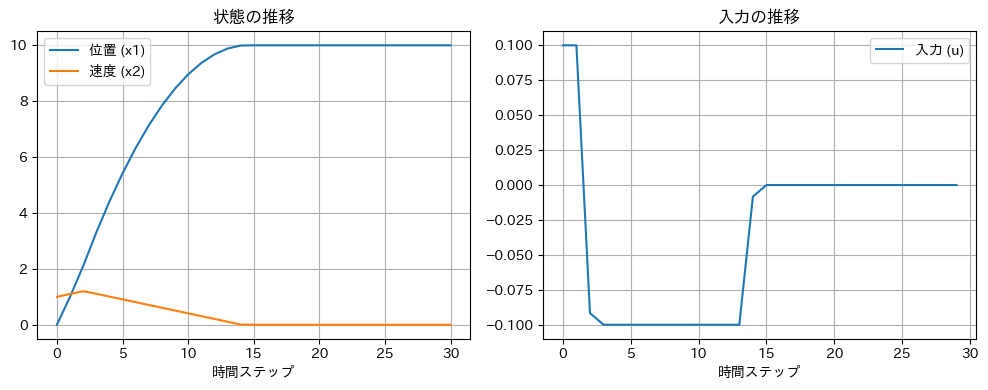

In [8]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

# ==== パラメータ設定 ====
N = 30                             # 制御ホライゾン
n_x = 2                            # 状態の次元
n_u = 1                            # 制御入力の次元
A = np.array([[1.0, 1.0], [0.0, 1.0]])  # システムダイナミクス
B = np.array([[0.0], [1.0]])            # 入力の影響
x_target = np.array([10.0, 0.0])         # 目標状態

# 制約
x_min = np.array([-10, -10])
x_max = np.array([10, 10])
u_min = np.array([-0.1])
u_max = np.array([0.1])

# ==== 最適化変数 ====
x = cp.Variable((n_x, N + 1))
u = cp.Variable((n_u, N))

# ==== コスト関数の定義 ====
cost = 0
constraints = []

for k in range(N):
    cost += cp.sum_squares(x[:, k] - x_target)  # 状態コスト
    cost += cp.sum_squares(u[:, k])             # 入力コスト
    constraints += [x[:, k + 1] == A @ x[:, k] + B @ u[:, k]]
    constraints += [x_min <= x[:, k], x[:, k] <= x_max]
    constraints += [u_min <= u[:, k], u[:, k] <= u_max]

# 終端の状態制約
constraints += [x_min <= x[:, N], x[:, N] <= x_max]

# ==== 初期条件の設定 ====
x_init = np.array([0.0, 1.0])  # 初期状態
constraints += [x[:, 0] == x_init]

# ==== 問題の定義と解法 ====
problem = cp.Problem(cp.Minimize(cost), constraints)
problem.solve()

# ==== 結果の表示 ====
print("最適な入力系列:", u.value)
print("最適な状態系列:", x.value)
print("最適コスト:", problem.value)

# ==== シミュレーションの可視化 ====
time_steps = np.arange(N + 1)
plt.figure(figsize=(10, 4))

# 状態遷移のプロット
plt.subplot(1, 2, 1)
plt.plot(time_steps, x.value[0, :], label='位置 (x1)')
plt.plot(time_steps, x.value[1, :], label='速度 (x2)')
plt.title('状態の推移')
plt.xlabel('時間ステップ')
plt.grid(True)
plt.legend()

# 入力のプロット

plt.subplot(1, 2, 2)
plt.plot(time_steps[:-1], u.value[0, :], label='入力 (u)')
plt.title('入力の推移')
plt.xlabel('時間ステップ')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [2]:
import numpy as np
list = [1,2,3]
list2 = np.array(list) ** 2
print(list2)

[1 4 9]
